In [1]:
import blimpy
from blimpy import Waterfall
from blimpy import utils
from blimpy import plotting

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

In [3]:
from scipy import signal
from numpy import random

In [4]:
import setigen as stg
from astropy import units as u

Define Functions

In [5]:
# define directory we will be using
data_dir = '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/'

In [10]:
os.getcwd()

'/datax/scratch/calebp'

In [6]:
def grab_file_list(data_dir,file_type,node_number):
    '''
    returns h5 and dat file path from given directory, ordered correctly
    '''
    
    ## h5 list
    data_list = []
    for dirname, _, filenames in os.walk(data_dir):
        for filename in filenames:
            if filename[-len(file_type):] == file_type and node_number in filename:
                data_list.append(data_dir + filename)
                
    data_list = sorted(data_list, key=lambda x: (x,x.split('_')[5]))

    return data_list

In [7]:
def plotter(file,f_start,f_end):
    '''
    Grabs the data of the waterfall object segment you are interested in
    '''
    # print('getting data',file)
    obs = Waterfall(file,f_start=f_start,f_stop=f_end)
    #grab data
    data = obs.data
    plot_f, plot_data = obs.grab_data(f_start,f_end)
    plot_data = plot_data.astype('float32')
    # print('got data')

    #
    MAX_PLT_POINTS      = 65536                  # Max number of points in matplotlib plot
    MAX_IMSHOW_POINTS   = (8192, 4096)           # Max number of points in imshow plot


    dec_fac_x, dec_fac_y = 1, 1
    if plot_data.shape[0] > MAX_IMSHOW_POINTS[0]:
        dec_fac_x = int(plot_data.shape[0] / MAX_IMSHOW_POINTS[0])

    if plot_data.shape[1] > MAX_IMSHOW_POINTS[1]:
        dec_fac_y = int(plot_data.shape[1] / MAX_IMSHOW_POINTS[1])
        
    plot_data = utils.rebin(plot_data, dec_fac_x, dec_fac_y)
    extent = plotting.plot_utils.calc_extent(obs, plot_f=plot_f, plot_t=obs.timestamps, MJD_time=60098.829675925925)
    reverse=False
    if reverse==True:
            plot_data = plot_data[..., ::-1]  # Reverse data
            plot_f = plot_f[::-1]
    plt.imshow(plot_data,
                   aspect='auto',
                   origin='lower',
                   rasterized=True,
                   interpolation='nearest',
                   extent = extent,
                   cmap='viridis',
                   )
    plt.colorbar()
    plt.rcParams["figure.figsize"] = (10,3)
    plt.xlabel("freq Mhz")
    plt.gca().invert_yaxis()

    return plot_data, extent

In [8]:
# get all the hits for the galaxy
all_events = pd.read_csv(data_dir+'master.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [9]:
all_events

Unnamed: 0  TopHitNum  DriftRate        SNR         Freq  ChanIndx  \
0           98         99  -3.357200  16.614767  1626.074536    489222   
1         3275        129  -3.949047  35.346443  1626.072731    489868   
2         6283         82  -3.867413  35.156647  1626.071865    490178   
3         1074       1075  -0.581643  50.394665  1379.313019    728225   
4         2487       1070  -0.581643  51.705360  1379.312656    728355   
5         3834        994  -0.581643  47.312977  1379.312287    728487   
6           34         35  -3.540877  29.898806  1626.137460    466700   
7         2909         90  -3.591898  36.759861  1626.137156    466809   
8         5892         21   3.765370  20.894644  1626.134130    467892   
9           37         38   3.775575  13.393381  1626.113812    475164   
10        2912         93   3.918434  13.793922  1626.114483    474924   
11        5895         24  -2.449021  21.985113  1626.118190    473597   
12         576        577  -0.591847  15.496568  1580.534830     11301   
13        3334        515  -0.551030  11.376476  1580.534464     11432   
14        6290        419  -0.500009  10.107123  1580.534115     11557   

      FreqStart      FreqEnd  CoarseChanNum  FullNumHitsInRange  \
0   1626.074536  1626.074536             21                   1   
1   1626.072731  1626.072731             21                   1   
2   1626.071865  1626.071865             21                   1   
3   1379.313019  1379.313019             41                   1   
4   1379.312656  1379.312656             41                   1   
5   1379.312287  1379.312287             41                   1   
6   1626.137460  1626.137460             21                   1   
7   1626.137156  1626.137156             21                   1   
8   1626.134130  1626.134130             21                   1   
9   1626.113812  1626.113812             21                   1   
10  1626.114483  1626.114483             21                   1   
11  1626.118190  1626.118190             21                   1   
12  1580.534830  1580.534830             37                   1   
13  1580.534464  1580.534464             37                   1   
14  1580.534115  1580.534115             37                   1   

                                               FileID  Source           MJD  \
0   blc03_guppi_59405_44453_And_II_0028.rawspec.00...  AND_II  59405.514502   
1   blc03_guppi_59405_45085_And_II_0030.rawspec.00...  AND_II  59405.521817   
2   blc03_guppi_59405_45735_And_II_0032.rawspec.00...  AND_II  59405.529340   
3   blc04_guppi_59405_44453_And_II_0028.rawspec.00...  AND_II  59405.514502   
4   blc04_guppi_59405_45085_And_II_0030.rawspec.00...  AND_II  59405.521817   
5   blc04_guppi_59405_45735_And_II_0032.rawspec.00...  AND_II  59405.529340   
6   blc73_guppi_58832_23983_And_II_0081.gpuspec.00...  AND_II  58832.277581   
7   blc73_guppi_58832_24618_And_II_0083.gpuspec.00...  AND_II  58832.284931   
8   blc73_guppi_58832_25266_And_II_0085.gpuspec.00...  AND_II  58832.292431   
9   blc73_guppi_58832_23983_And_II_0081.gpuspec.00...  AND_II  58832.277581   
10  blc73_guppi_58832_24618_And_II_0083.gpuspec.00...  AND_II  58832.284931   
11  blc73_guppi_58832_25266_And_II_0085.gpuspec.00...  AND_II  58832.292431   
12  blc73_guppi_58832_23983_And_II_0081.gpuspec.00...  AND_II  58832.277581   
13  blc73_guppi_58832_24618_And_II_0083.gpuspec.00...  AND_II  58832.284931   
14  blc73_guppi_58832_25266_And_II_0085.gpuspec.00...  AND_II  58832.292431   

          RA      DEC     DELTAT    DELTAF  max_drift_rate  obs_length  \
0   1.274947  33.4189  18.253611 -2.793968             4.0  292.057776   
1   1.274453  33.4215  18.253611 -2.793968             4.0  292.057776   
2   1.275253  33.4248  18.253611 -2.793968             4.0  292.057776   
3   1.274933  33.4192  18.253611 -2.793968             4.0  292.057776   
4   1.274453  33.4215  18.253611 -2.793968             4.0  292.057776   
5   1.275253  33.4248  18.253611 -2.7

In [10]:
def get_f_bounds(event_number):
    drift_rate = all_events["DriftRate"][event_number]
    freq = all_events["Freq"][event_number]
    f_start = freq - (drift_rate/10**6)*2000
    f_end = freq + (drift_rate/10**6)*2000
    return f_start,f_end,drift_rate

In [15]:
def cycle_events(all_events):
    '''
    Cycles through the hits of a given galaxy, plots them, and returns the events as np arrays 
    '''
    all_plot_data = []
    all_extents = []
    all_file_names = []
    for i in range(0,len(all_events)):
        file = data_dir + all_events["FileID"][i]
        file = file[:-3]+"h5"
        drift_rate = all_events["DriftRate"][i]
        freq = all_events["Freq"][i]
        f_start = freq - (drift_rate/10**6)*2000
        f_end = freq + (drift_rate/10**6)*2000
    
    
        node = file.split("/")[-1][0:5]
        print(f"================================ {i} -- NODE {node} =============================")
        print("f_start,",f_start,"f_stop:",f_end,"file:",file)
              
        h5_list_path = grab_file_list(data_dir, '.h5',node)
        this_cadence_data = []
        this_cadence_extents = []
        all_file_names.append(h5_list_path)        
        # print(h5_list_path)
        for file in h5_list_path:
            plot_data, extent = plotter(file,f_start,f_end)
            this_cadence_data.append(plot_data)
            this_cadence_extents.append(extent)
            plt.show()
        all_plot_data.append(this_cadence_data)
        all_extents.append(this_cadence_extents)
    return all_plot_data, all_extents, all_file_names
    

================================ 0 -- NODE blc03 =============================
f_start, 1626.0812504 f_stop: 1626.0678216000001 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


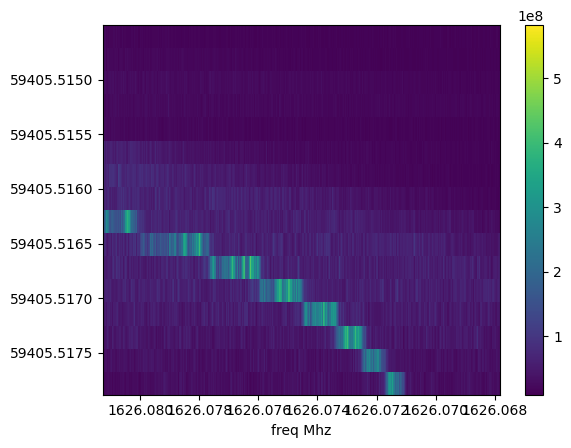

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


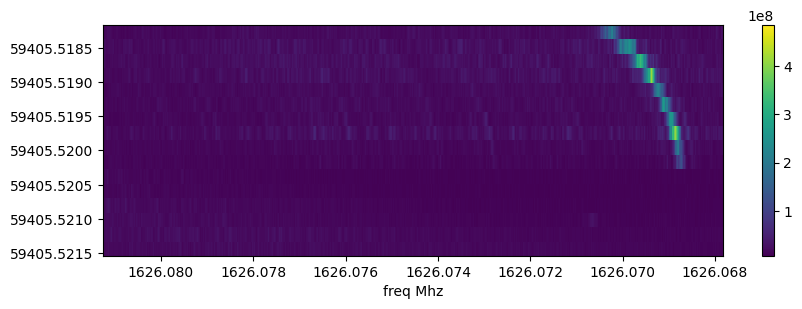

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


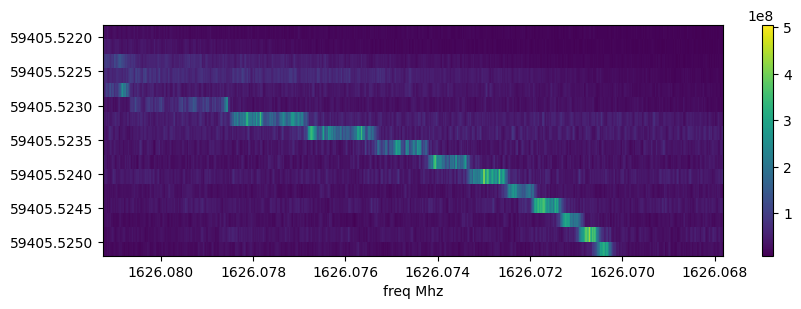

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


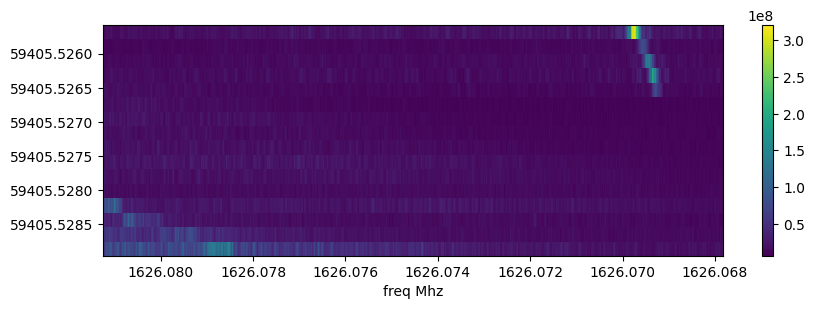

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


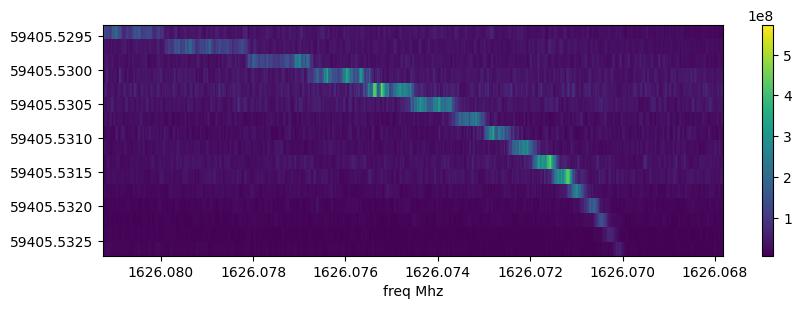

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


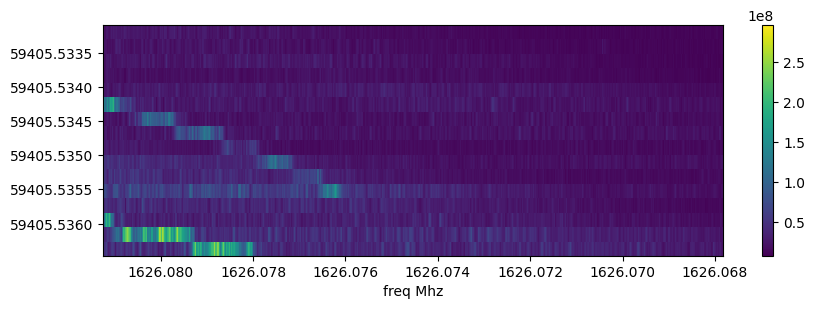

================================ 1 -- NODE blc03 =============================
f_start, 1626.080629094 f_stop: 1626.064832906 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


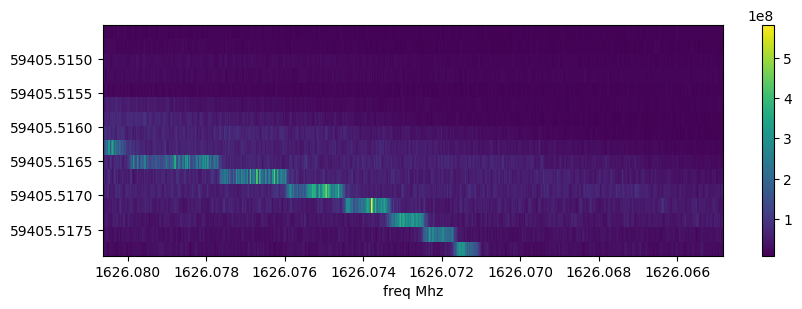

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


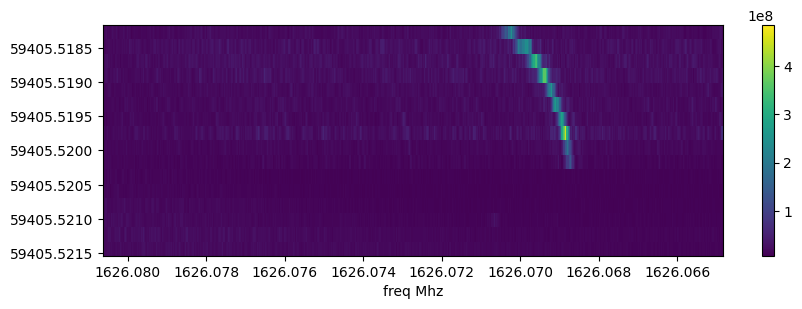

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


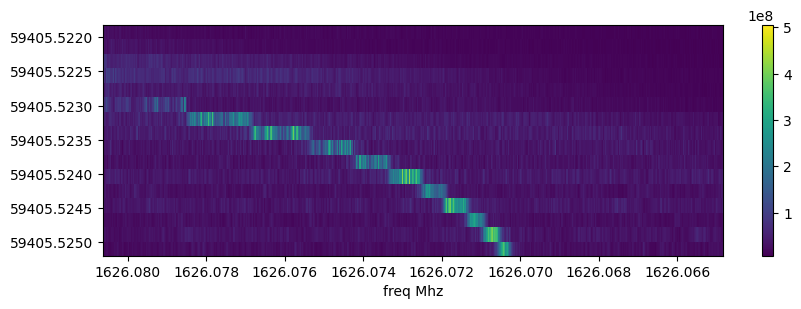

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


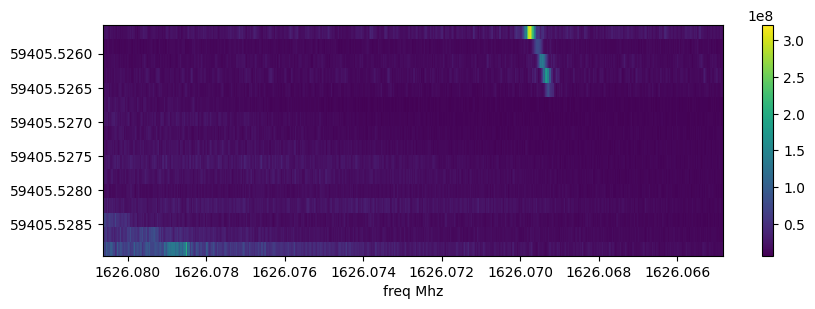

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


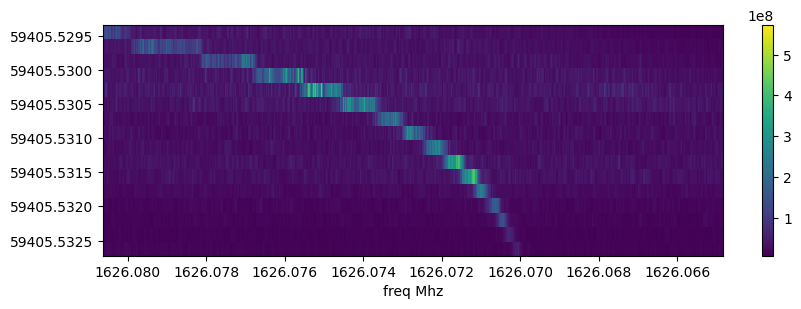

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


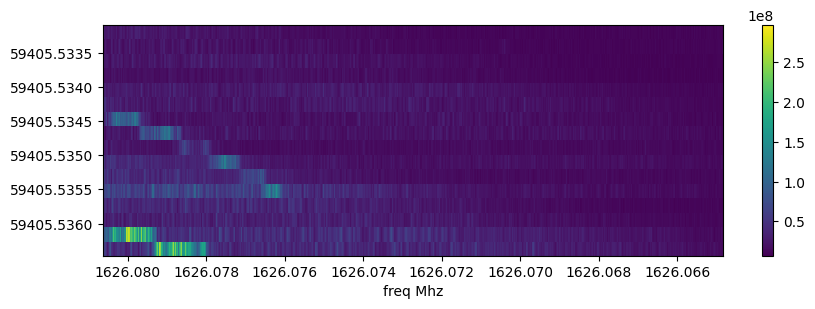

================================ 2 -- NODE blc03 =============================
f_start, 1626.0795998259998 f_stop: 1626.064130174 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


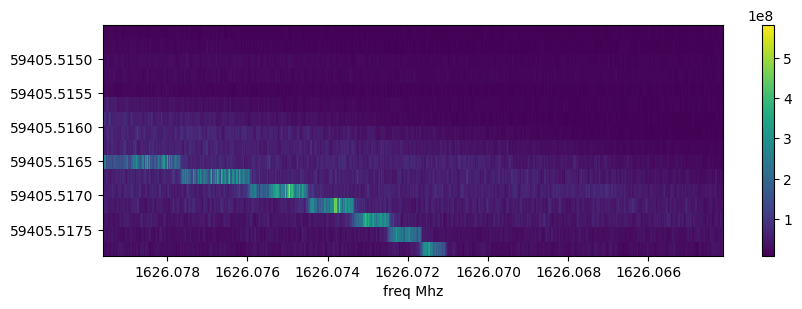

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


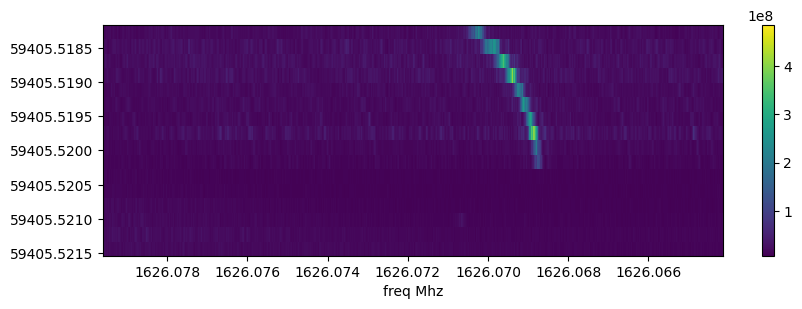

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


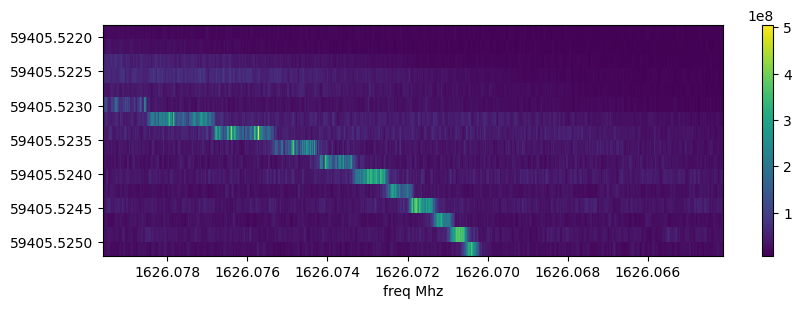

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


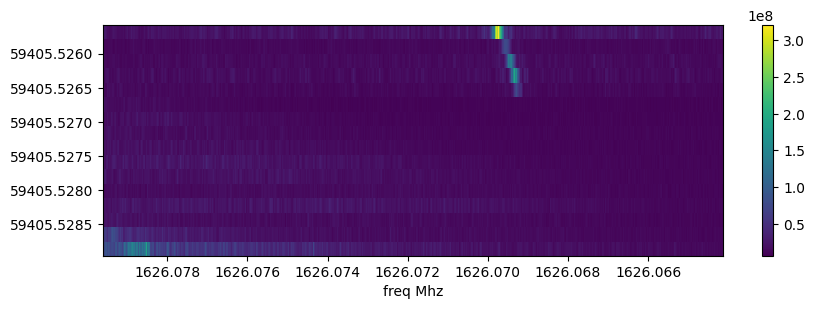

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


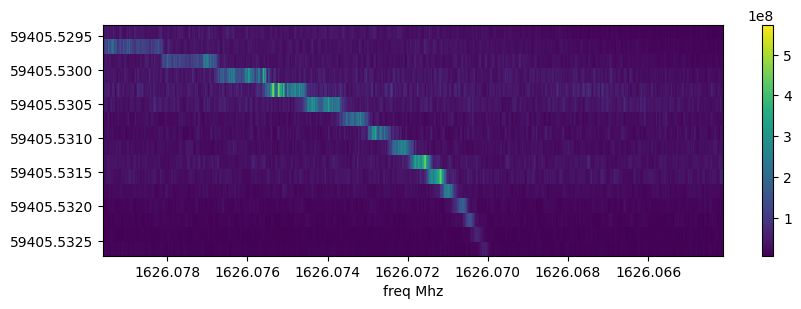

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


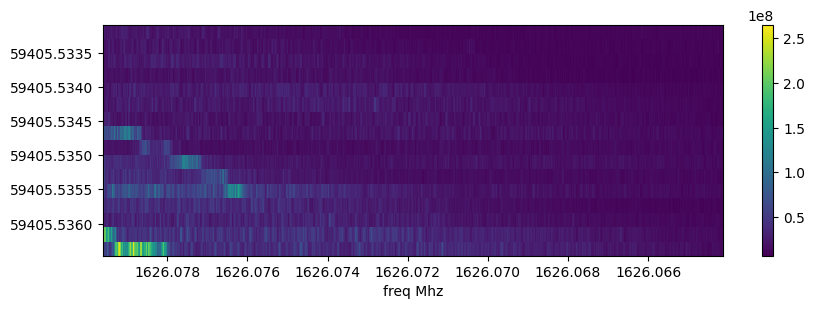

================================ 3 -- NODE blc04 =============================
f_start, 1379.314182286 f_stop: 1379.3118557139999 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_44453_And_II_0028.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


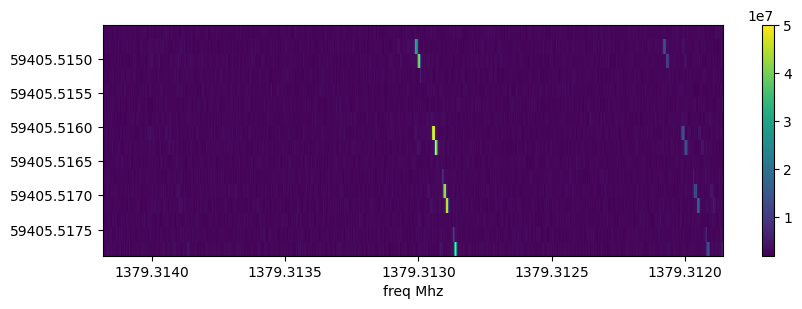

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


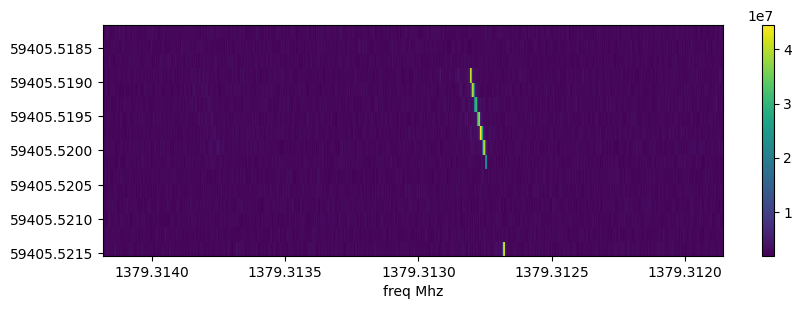

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


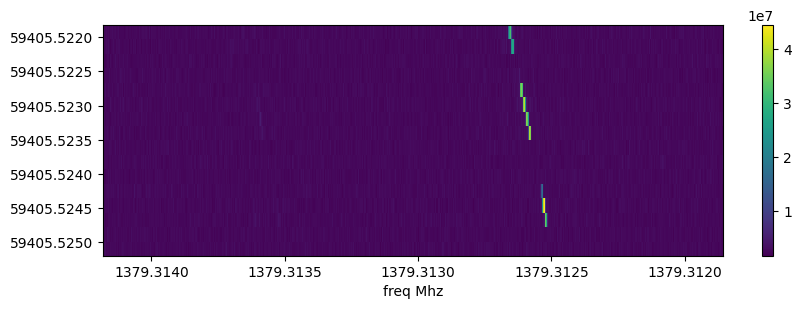

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


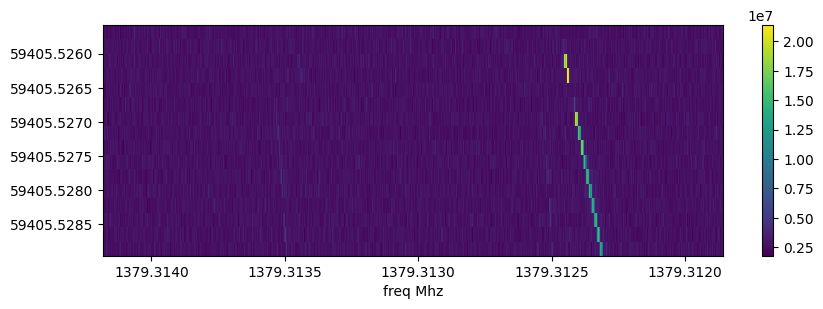

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


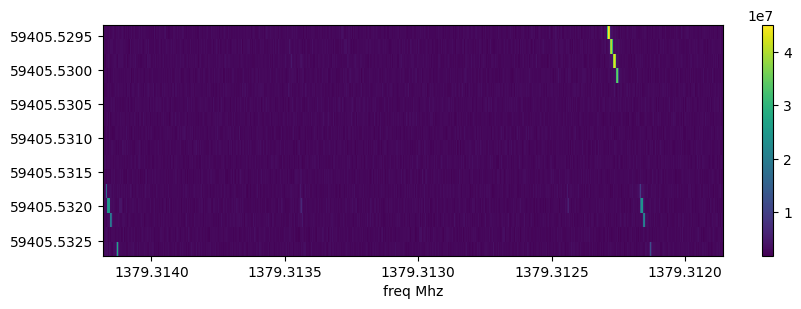

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


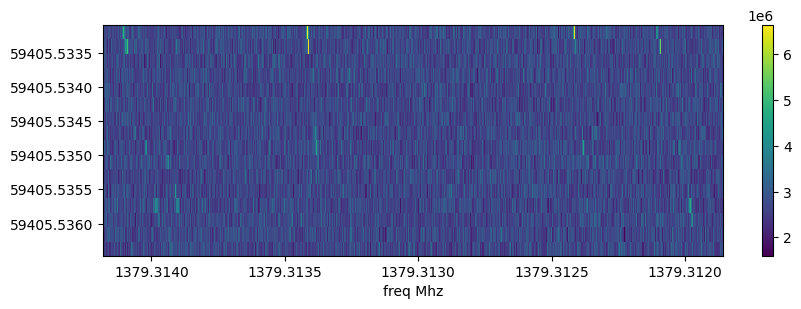

================================ 4 -- NODE blc04 =============================
f_start, 1379.3138192860001 f_stop: 1379.311492714 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_45085_And_II_0030.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


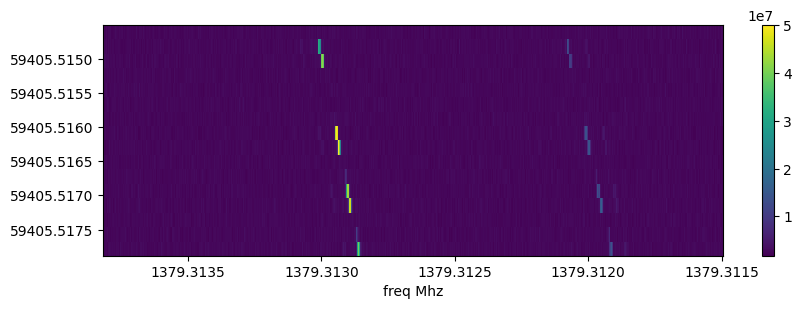

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


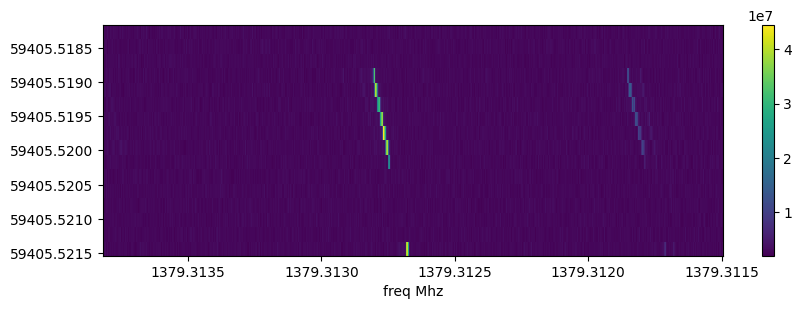

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


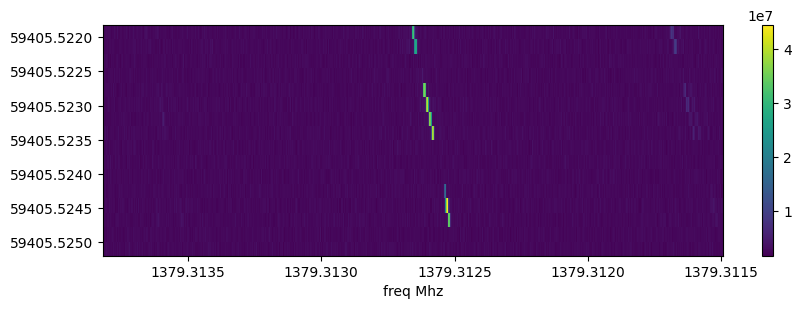

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


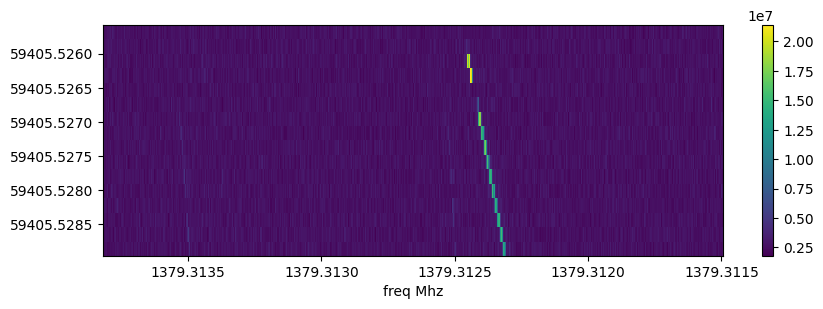

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


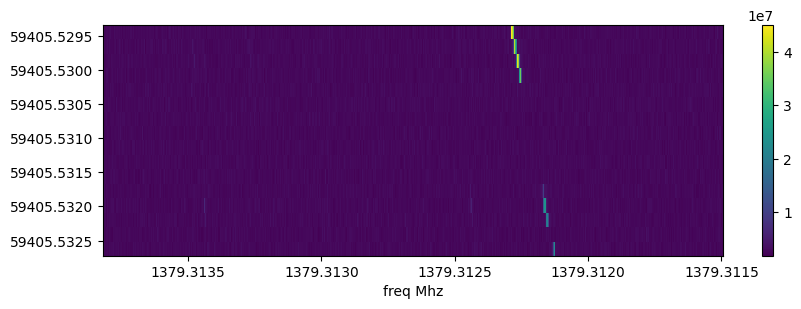

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


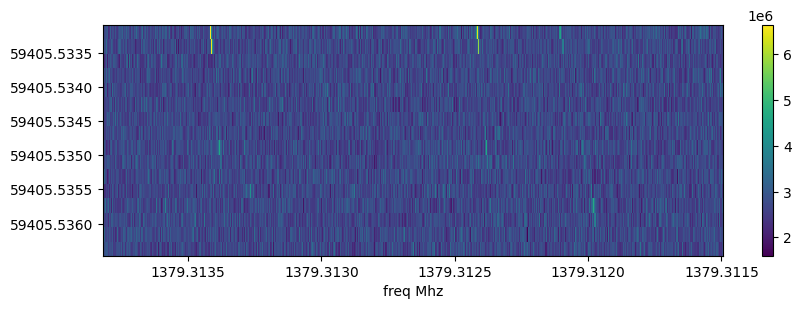

================================ 5 -- NODE blc04 =============================
f_start, 1379.313450286 f_stop: 1379.311123714 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc04_guppi_59405_45735_And_II_0032.rawspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


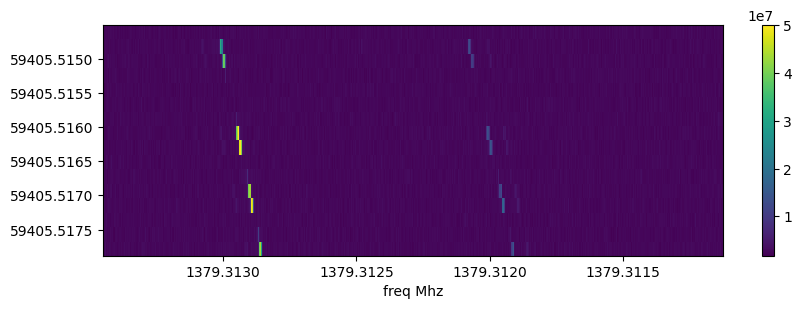

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


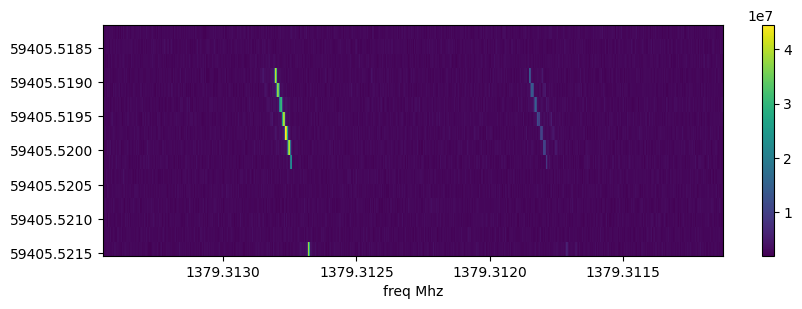

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


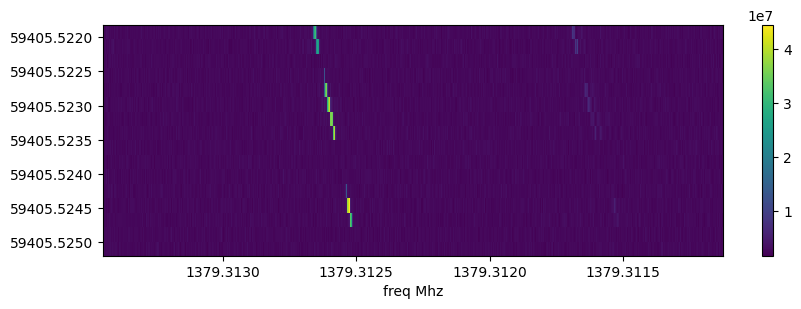

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


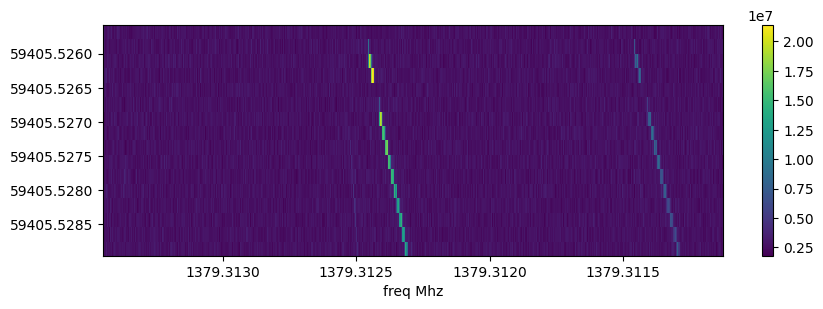

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


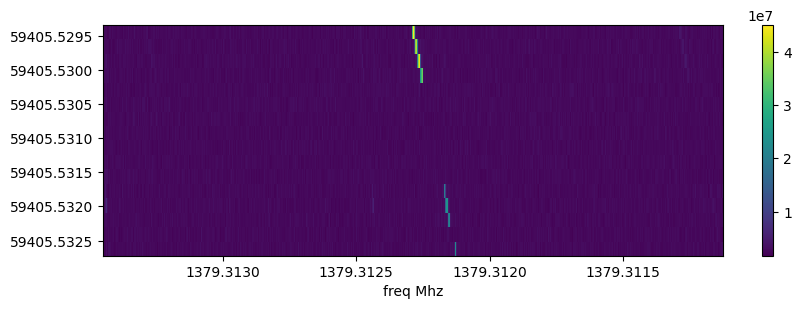

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


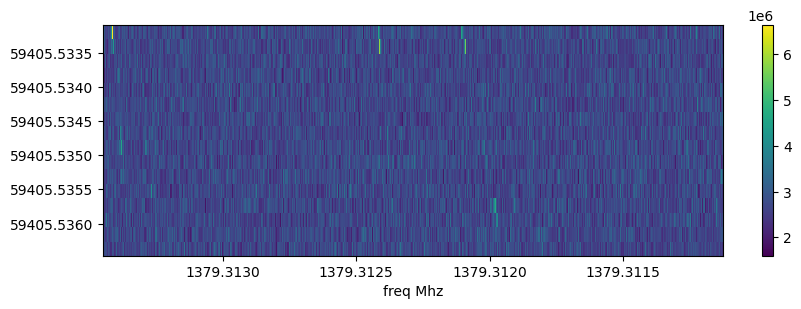

================================ 6 -- NODE blc73 =============================
f_start, 1626.1445417539999 f_stop: 1626.130378246 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


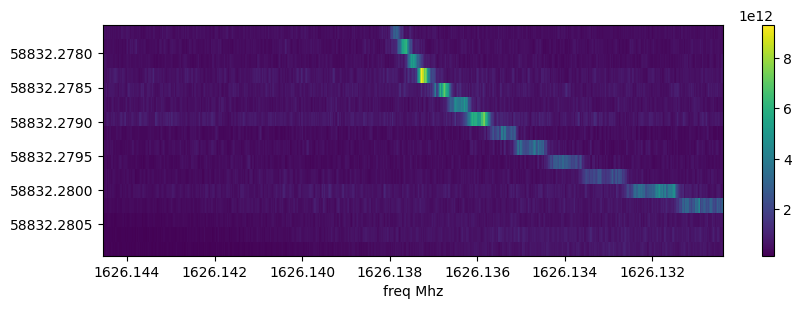

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


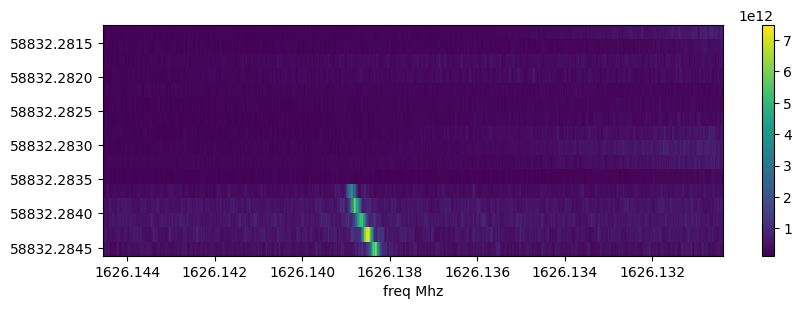

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


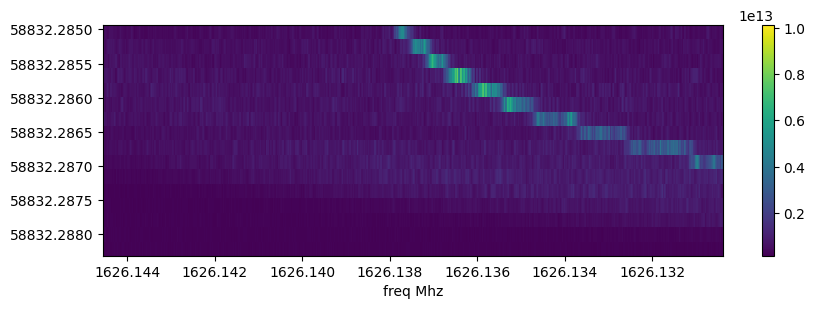

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


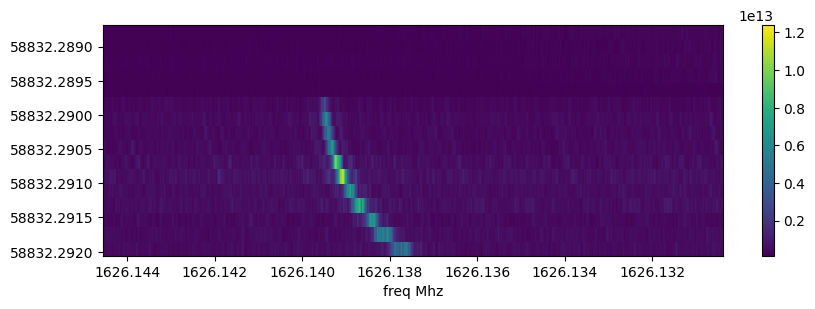

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


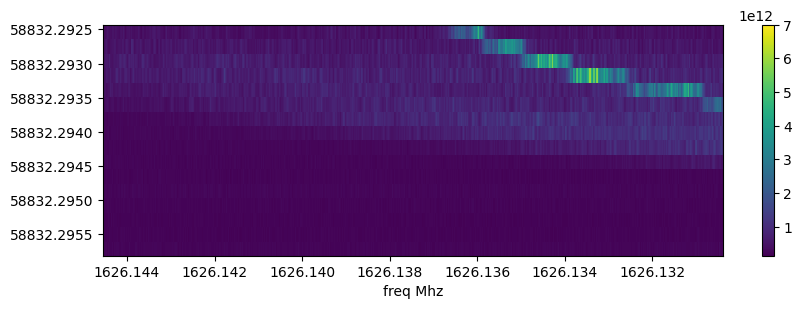

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


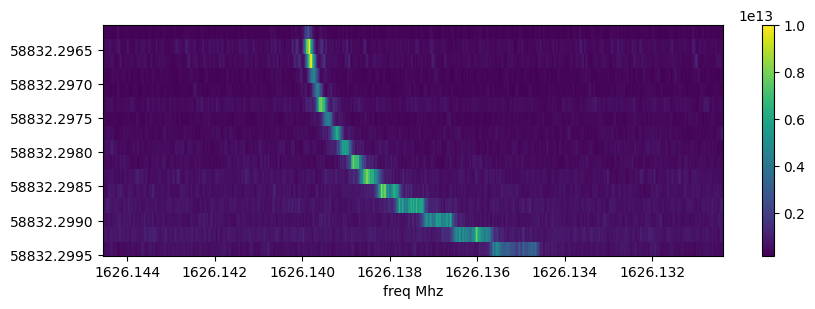

================================ 7 -- NODE blc73 =============================
f_start, 1626.144339796 f_stop: 1626.129972204 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


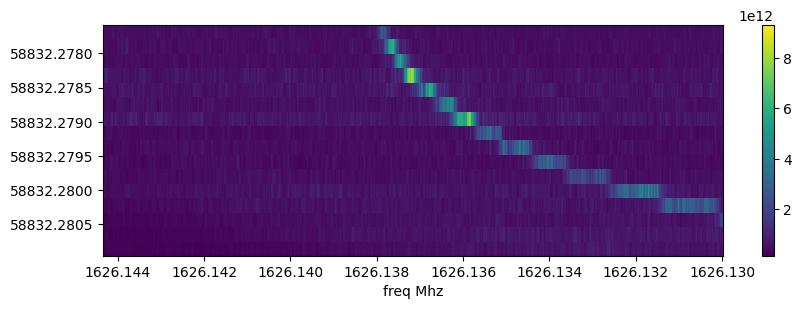

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


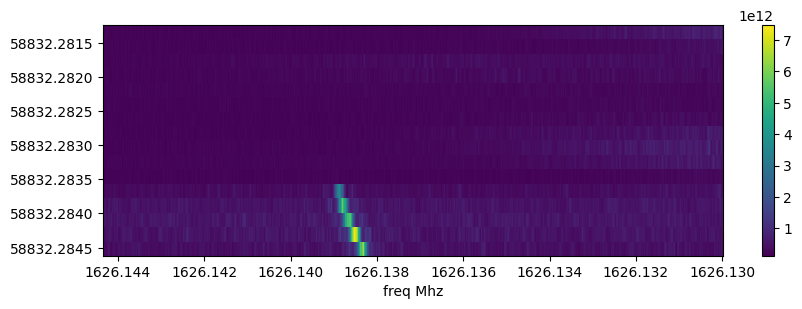

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


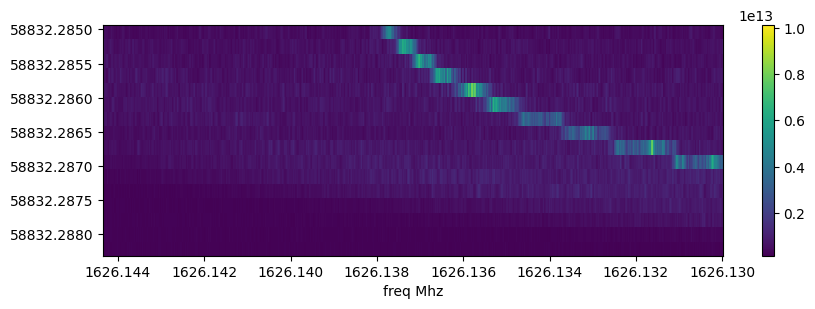

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


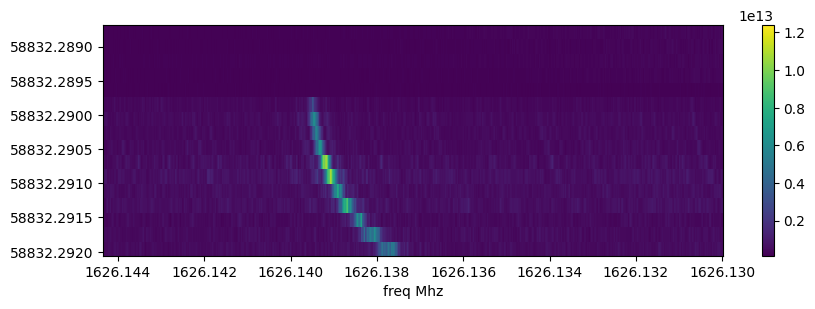

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


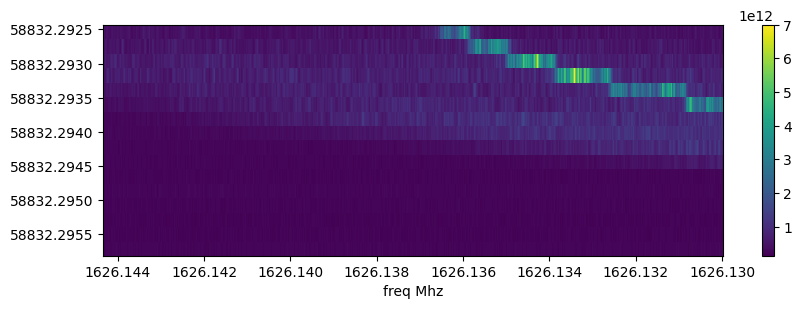

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


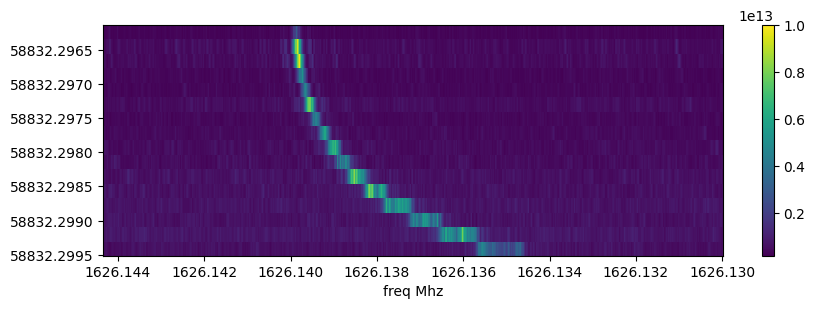

================================ 8 -- NODE blc73 =============================
f_start, 1626.12659926 f_stop: 1626.14166074 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5


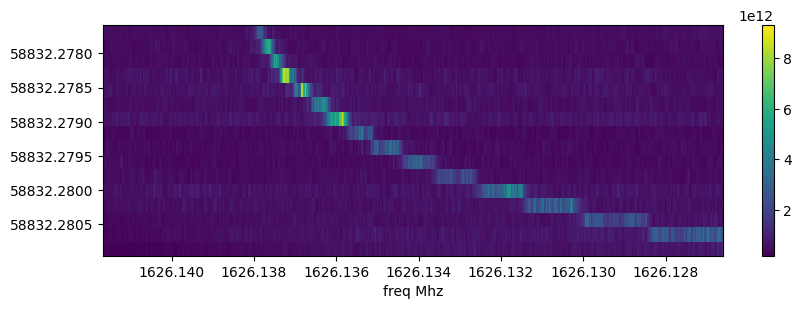

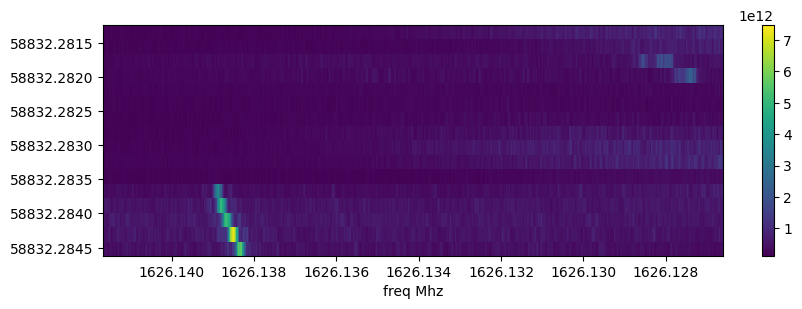

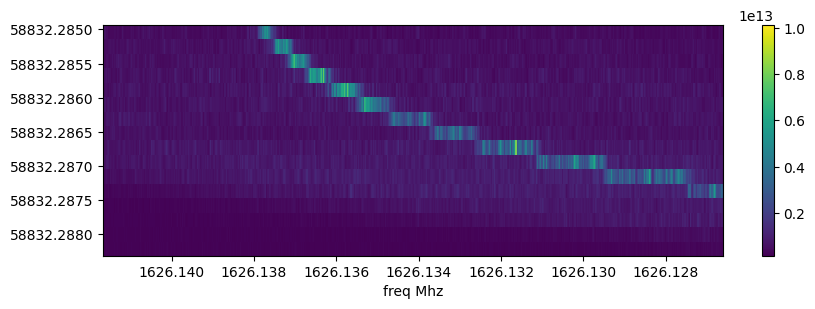

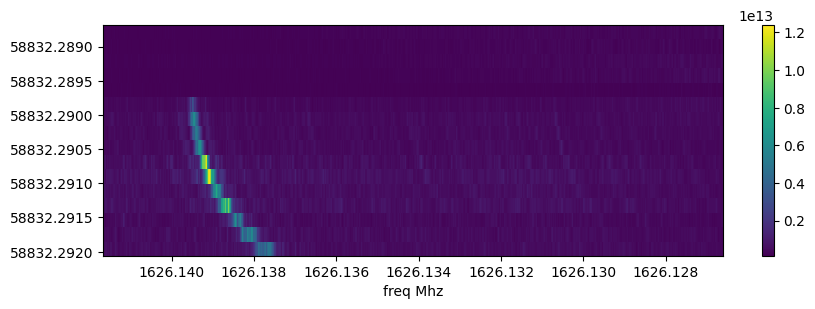

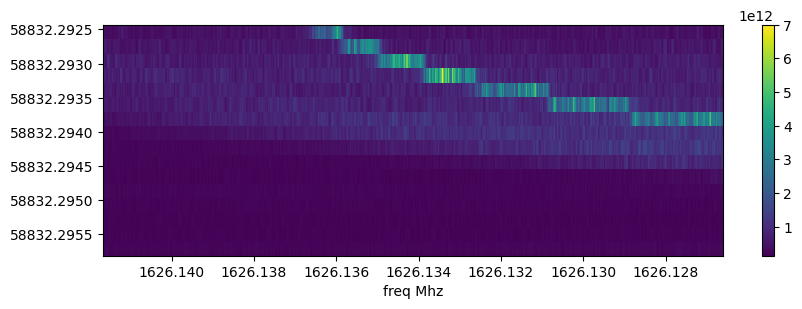

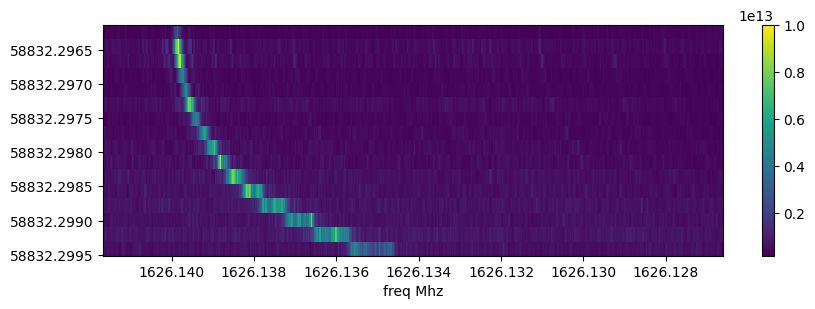

================================ 9 -- NODE blc73 =============================
f_start, 1626.1062608500001 f_stop: 1626.12136315 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5


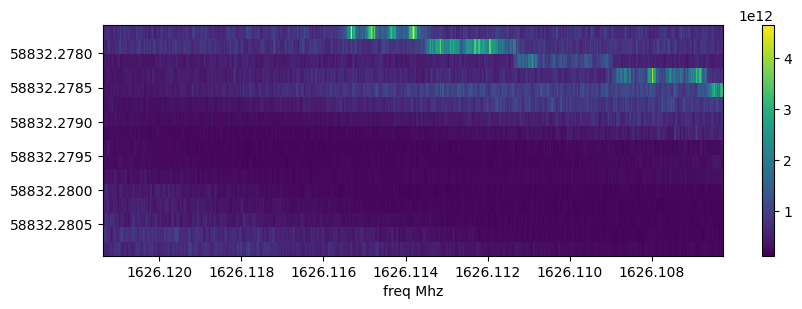

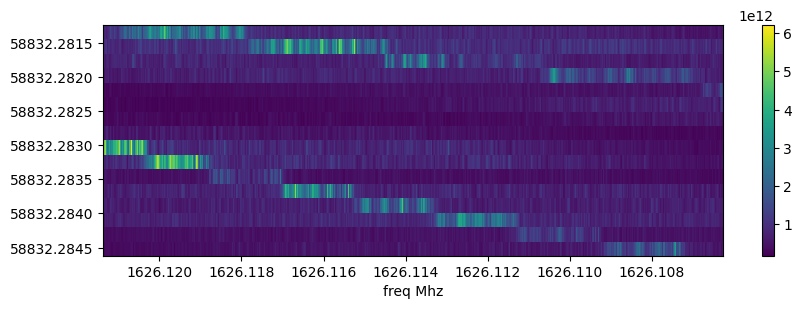

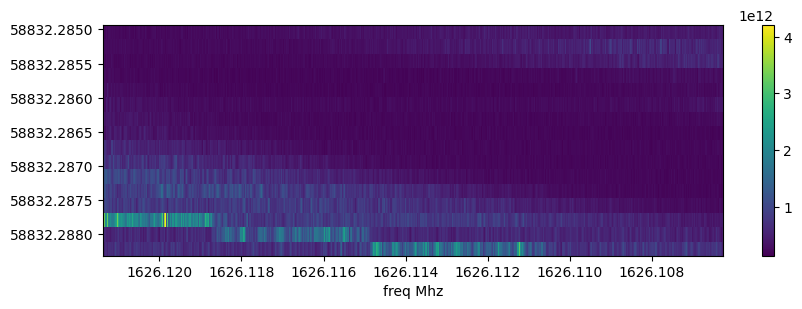

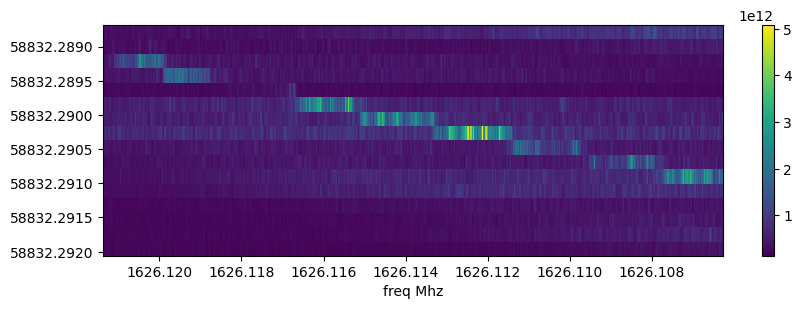

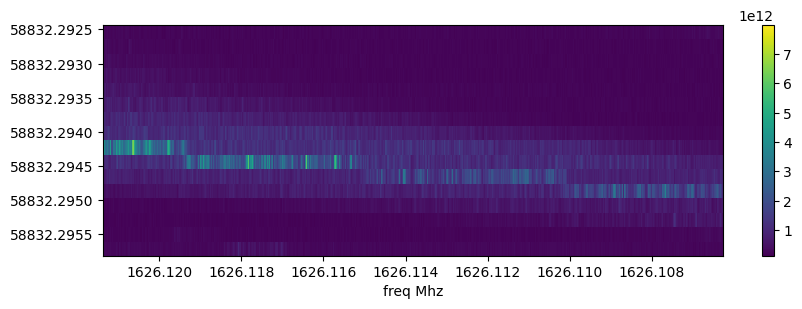

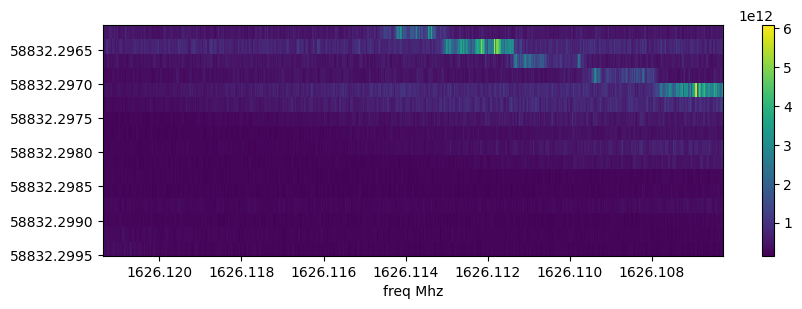

================================ 10 -- NODE blc73 =============================
f_start, 1626.1066461320002 f_stop: 1626.122319868 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5


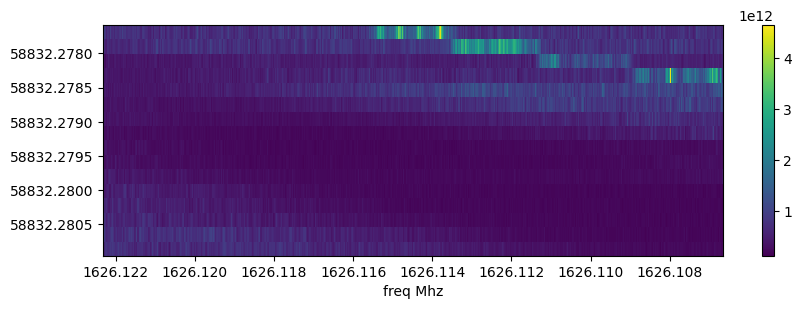

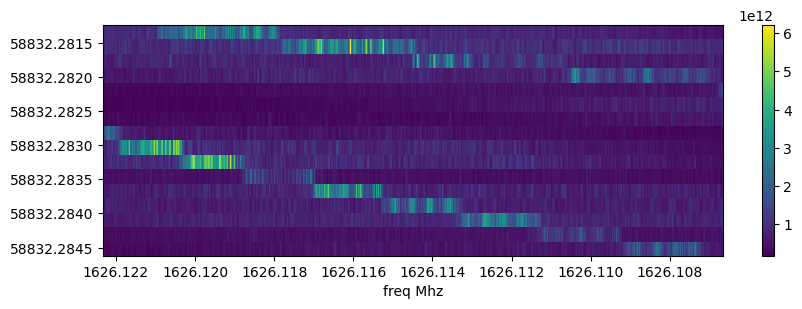

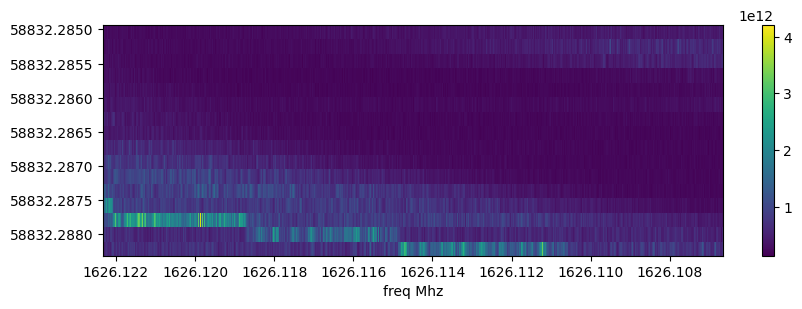

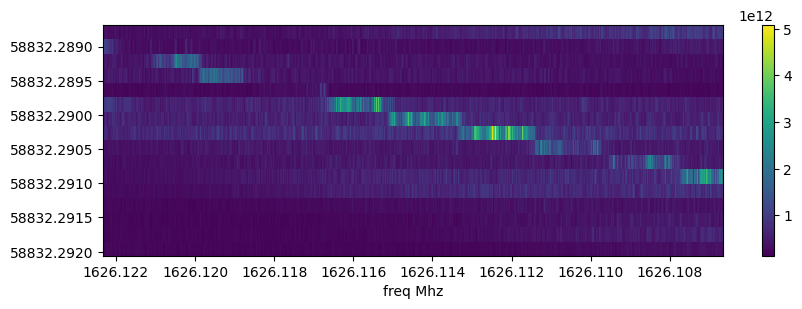

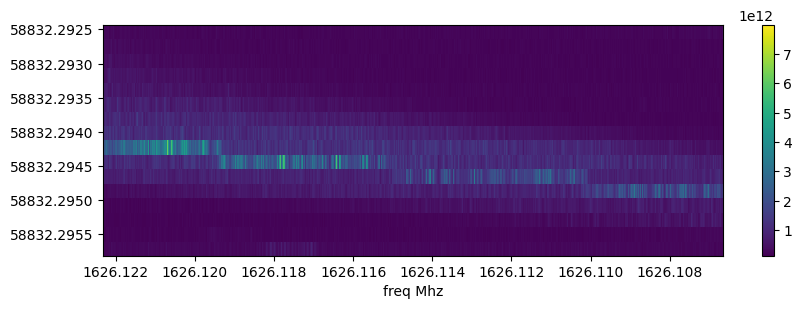

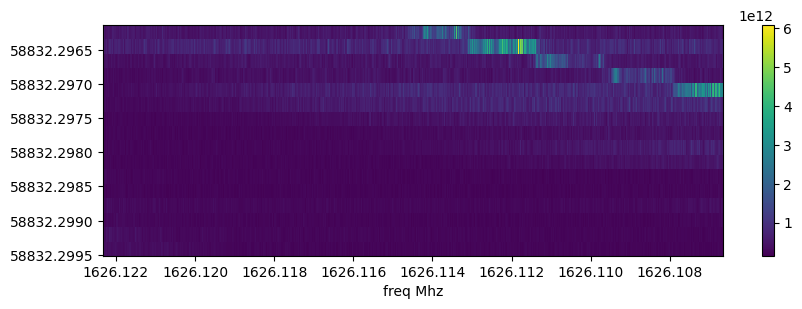

================================ 11 -- NODE blc73 =============================
f_start, 1626.1230880419998 f_stop: 1626.113291958 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


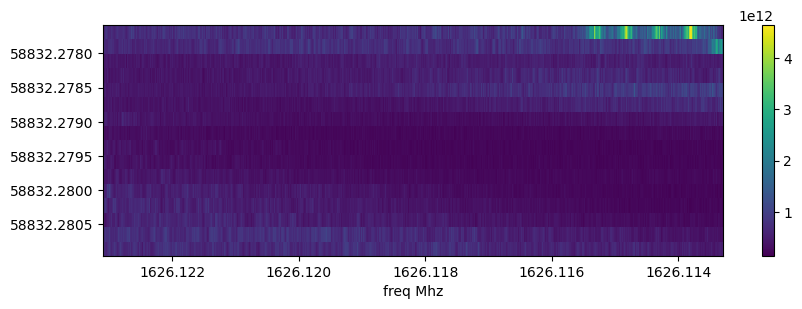

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


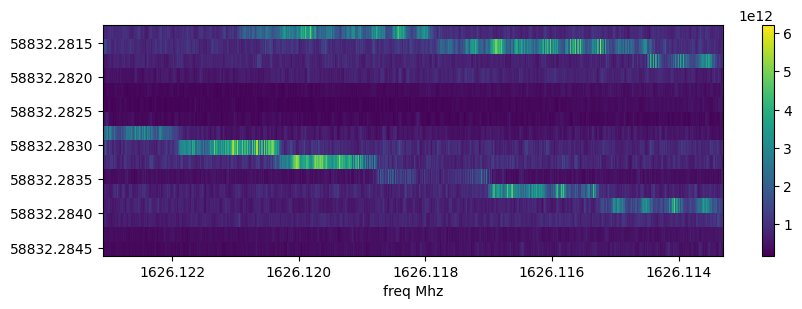

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


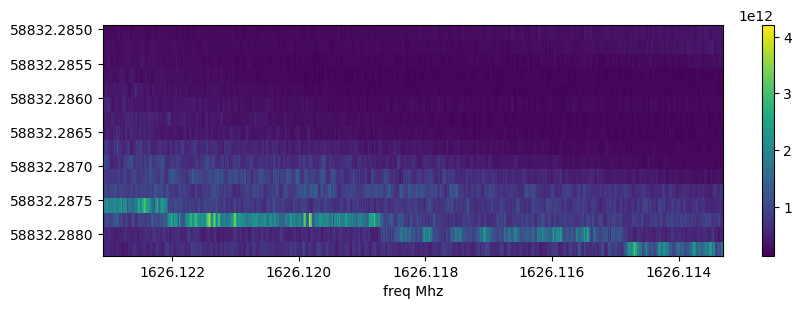

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


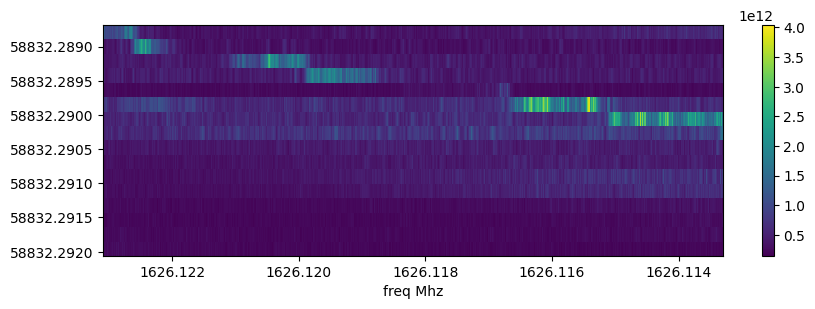

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


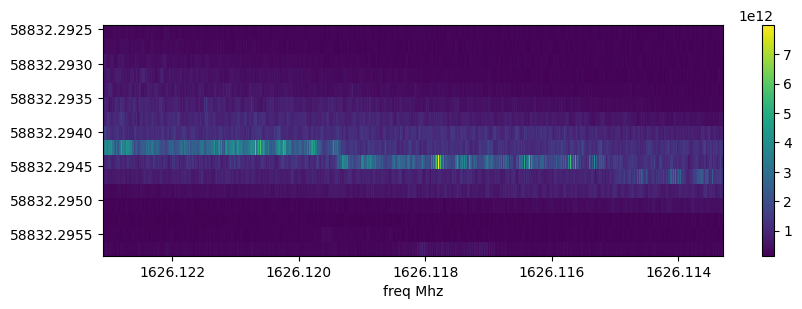

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


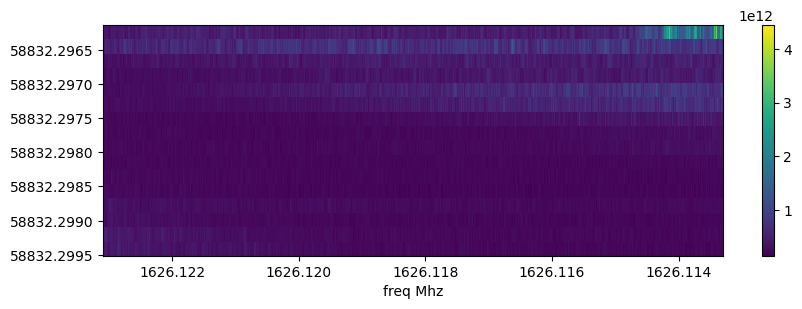

================================ 12 -- NODE blc73 =============================
f_start, 1580.536013694 f_stop: 1580.533646306 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_23983_And_II_0081.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


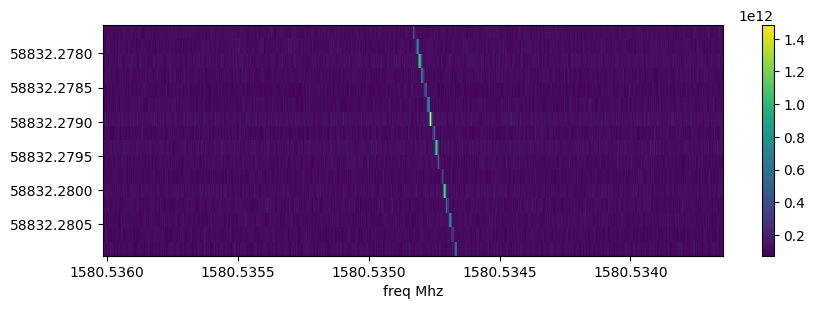

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


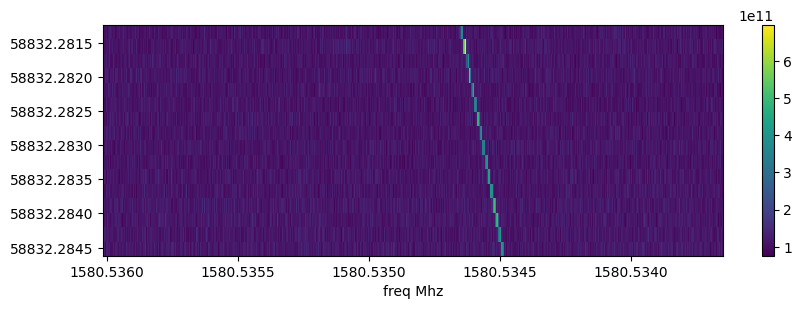

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


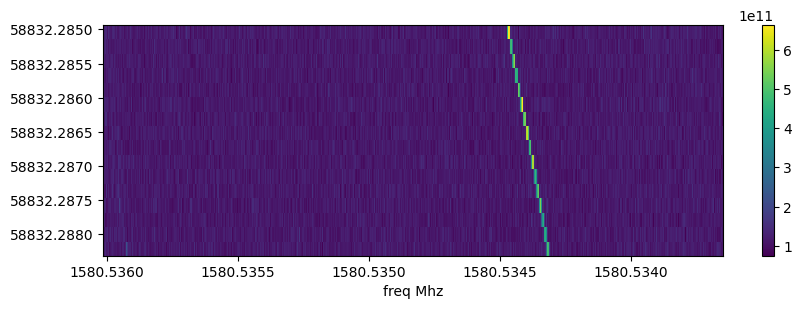

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


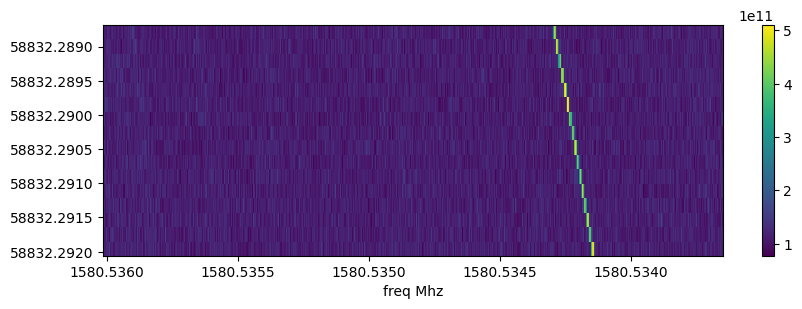

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


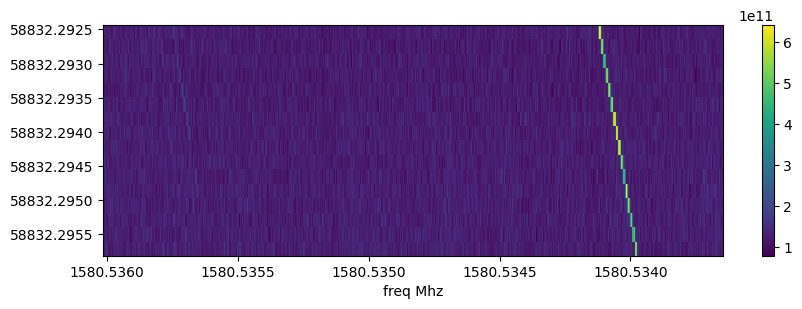

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


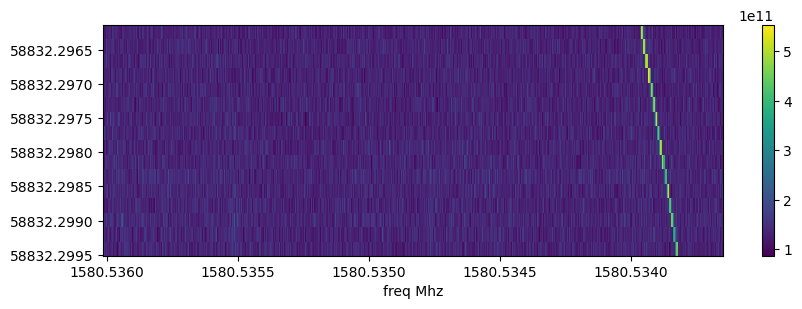

================================ 13 -- NODE blc73 =============================
f_start, 1580.53556606 f_stop: 1580.53336194 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_24618_And_II_0083.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


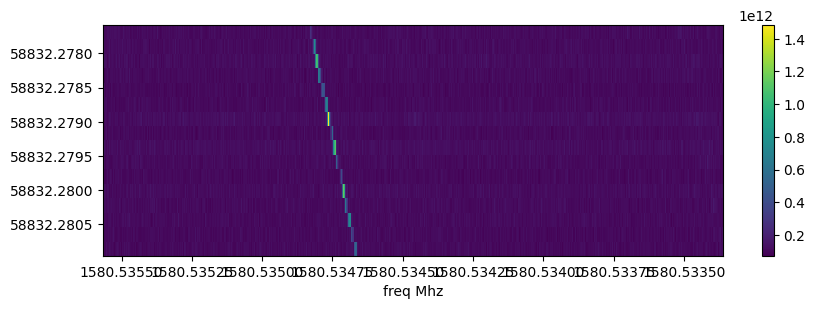

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


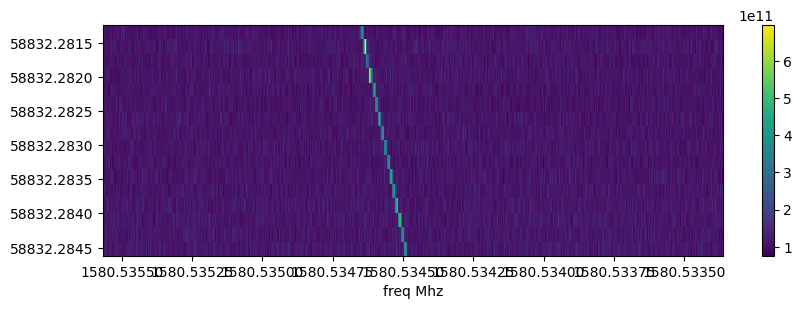

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


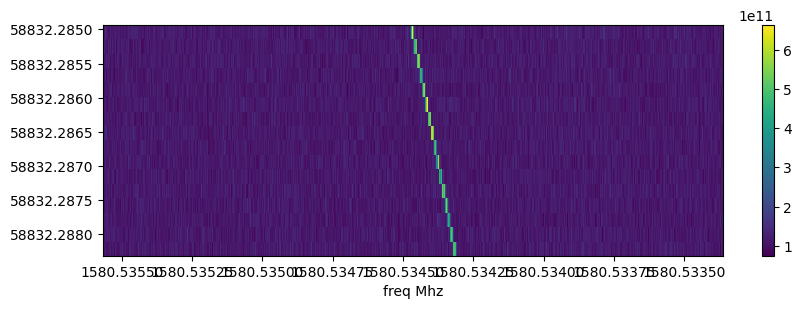

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


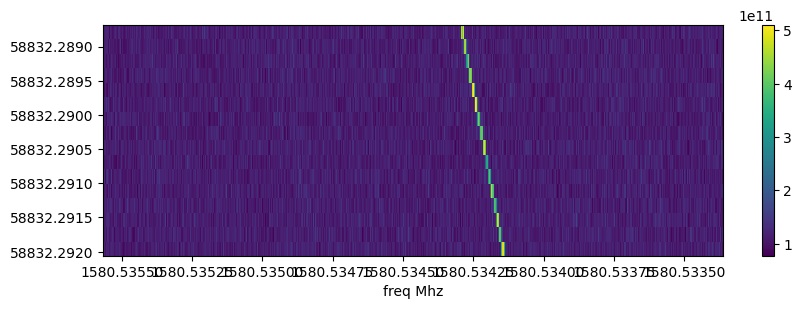

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


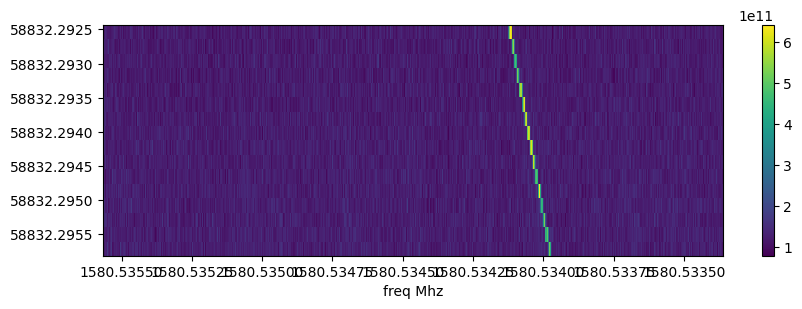

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


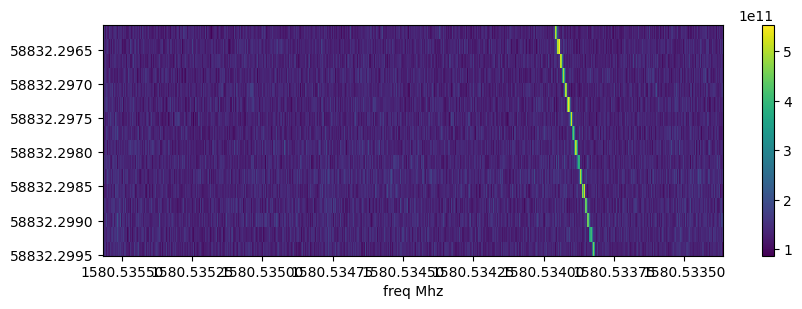

================================ 14 -- NODE blc73 =============================
f_start, 1580.535115018 f_stop: 1580.533114982 file: /datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc73_guppi_58832_25266_And_II_0085.gpuspec.0000.h5
blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


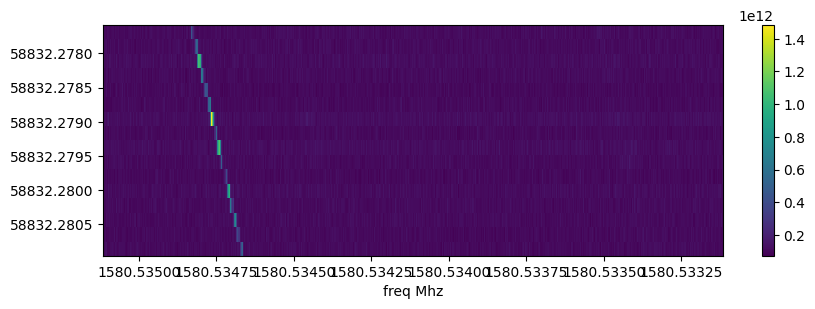

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


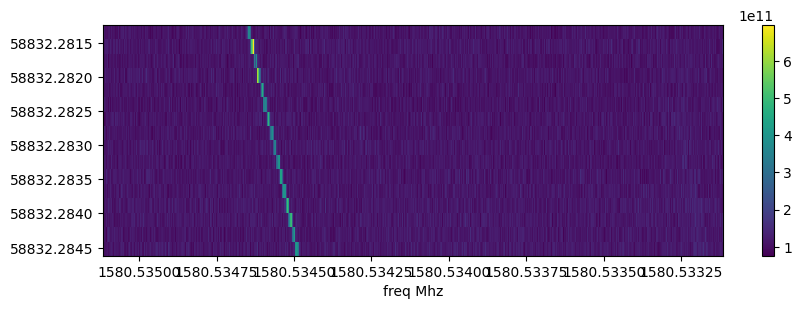

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


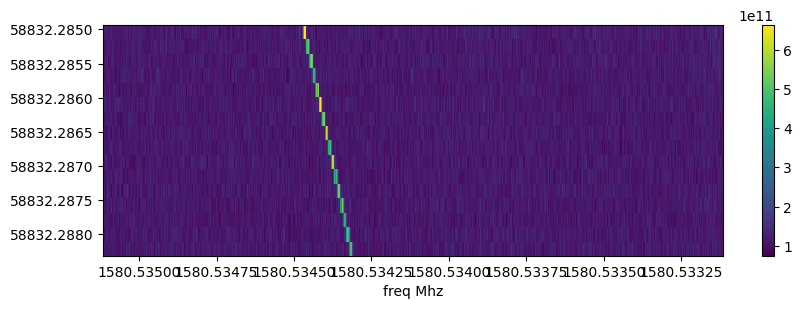

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


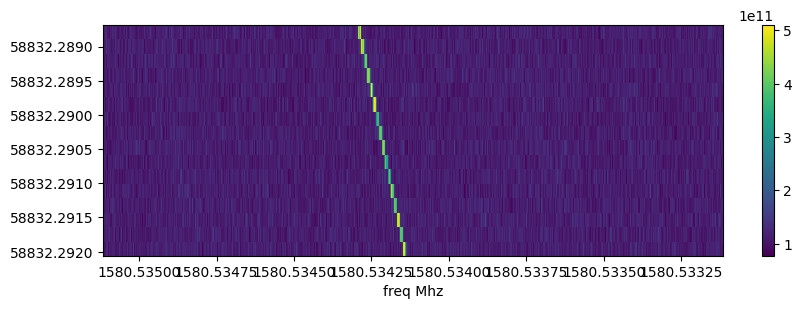

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


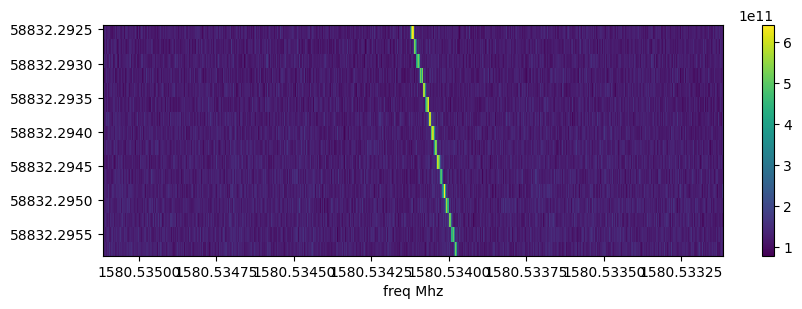

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


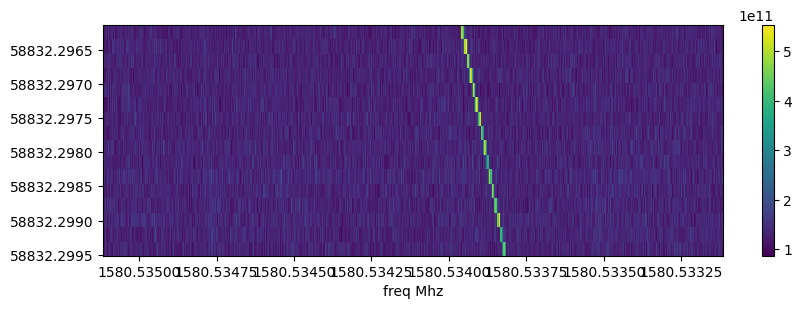

In [16]:
all_plot_data, all_extents, all_file_names = cycle_events(all_events)

In [177]:
all_file_names[2][1]

'/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5'

In [28]:
def check_pearson(obs,change, x_def,y_def):
    '''
    Check if two closest frames on different targets are highly correlated 
    '''

    frame_1 = 0
    frame_2 = 1
    x = all_plot_data[obs][frame_1][15]
    y = all_plot_data[obs][frame_2][0]
    # print(x)

    # x_def = kwargs.get('x_def', None)
    # y_def = kwargs.get('y_def', None)

    if change == True:
        print("changing x")
        x = x_def[15]
        y = y_def[0]
        x = np.flip(x)
        y = np.flip(y)
    # print(x)

    start_time_1 = int(all_file_names[obs][frame_1].split('/')[-1].split('_')[3])
    start_time_2 = int(all_file_names[obs][frame_2].split('/')[-1].split('_')[3])
    print(start_time_1, start_time_2)
    lag_time = start_time_2-start_time_1
    drift_rate = all_events["DriftRate"][obs]
    print(drift_rate)
    drift_rate = 2

    shift = abs(int(np.round(drift_rate * lag_time / -2.793968)))

    print('calc shift',shift)
    

    
    # corr = signal.correlate(x, y, mode="full")
    # lags = signal.correlation_lags(x.size, y.size, mode="full")

    fig, (ax_orig, ax_noise) = plt.subplots(2, 1, figsize=(10, 10))
    ax_orig.plot(x)
    ax_orig.set_title("Frame 1")

    ax_noise.plot(y)
    ax_noise.set_title("Frame 2")

    # ax_corr.plot(lags, corr)
    # ax_corr.set_title("Correlation")

    plt.show()

    # get maximum shift value from doppler
    # maxi = np.where(corr == np.max(corr))
    # shift = -int(lags[0]+ maxi)
    # print("lag:'",shift)

    if shift != 0:
    
        all_pearsons = []
        if shift > 20:
            edge = 20
        else:
            edge = shift
        for i in range(shift-edge,shift+edge):
            if i != 0:
                my_pd=pd.DataFrame(data=[x[:-i],y[i:]]).transpose()
            else: 
                my_pd=pd.DataFrame(data=[x,y]).transpose()
            pearson = my_pd.corr().iloc[0,1]
            all_pearsons.append(pearson)
    
        plt.plot(all_pearsons,color='red')
        print(all_pearsons)
        plt.title("Pearson Metric")
        plt.ylim(0,1)
        plt.show()
        print("Max Pearson",max(all_pearsons))
    
        rolling_pearson(x,y,shift)

In [12]:
def rolling_pearson(x,y,shift):
    
    r_window_size = 100
    df_x = pd.DataFrame(x[:-shift])
    df_y = pd.DataFrame(y[shift:])
    rolling_r = df_x.rolling(window=r_window_size, center=True).corr(df_y)
    

    plt.plot(rolling_r)
    plt.show()

44453 44769
-3.949047
calc shift 447


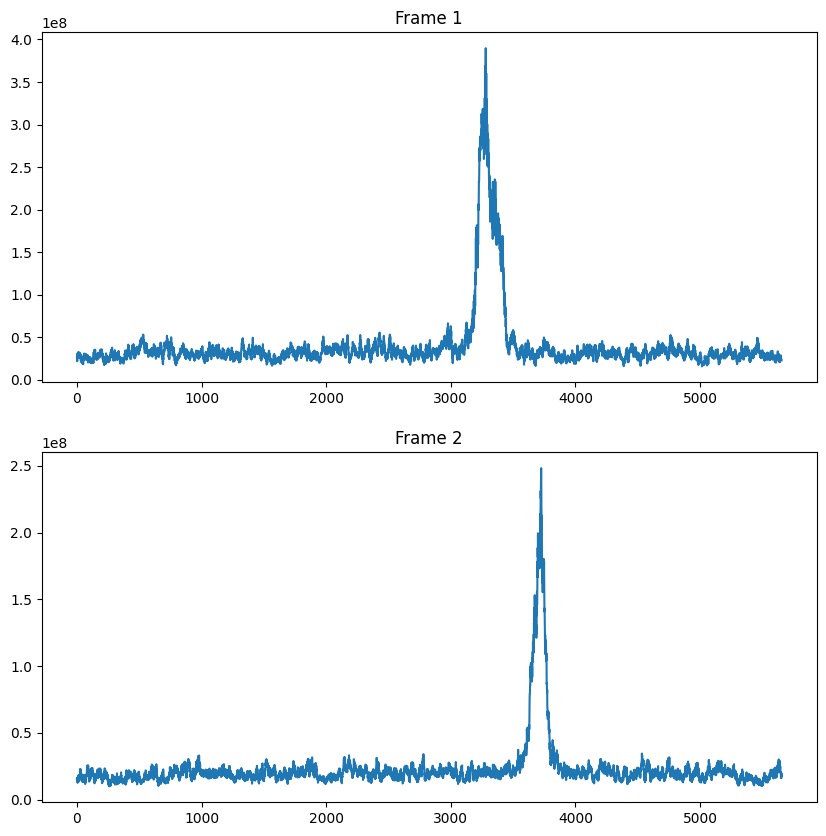

[0.8876360031168409, 0.8869119737830811, 0.8883434596892115, 0.8884953562472818, 0.8893556392659703, 0.8886717905643553, 0.8903585517439818, 0.8906919211434046, 0.8910303516168849, 0.8905431929884905, 0.8916827887983292, 0.8914189634448049, 0.8908399964505741, 0.8899589993856722, 0.8903185531151933, 0.8884436535611057, 0.8871404383388051, 0.8851330597299552, 0.8837964409532105, 0.8806997719437514, 0.878022145325715, 0.8751449455744014, 0.8728236743056514, 0.8688776386445846, 0.8656435508309257, 0.862079005568119, 0.859303465512646, 0.8553390672443641, 0.8525441087211648, 0.8491043545607407, 0.8460717624570601, 0.8427946024334442, 0.840158624095751, 0.837056265071766, 0.8340385382154264, 0.8303898149212251, 0.8272582376640608, 0.8236499159404483, 0.819722917801276, 0.8150539120579334]


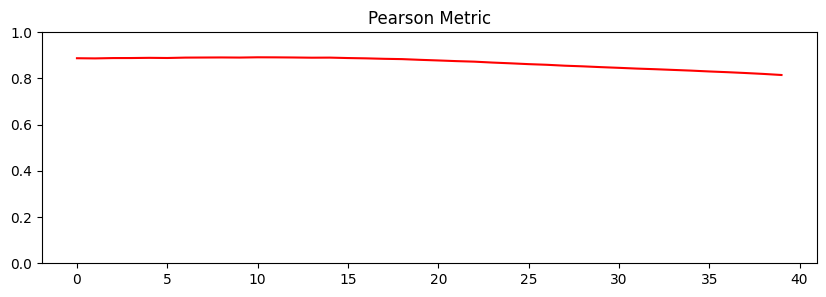

Max Pearson 0.8916827887983292


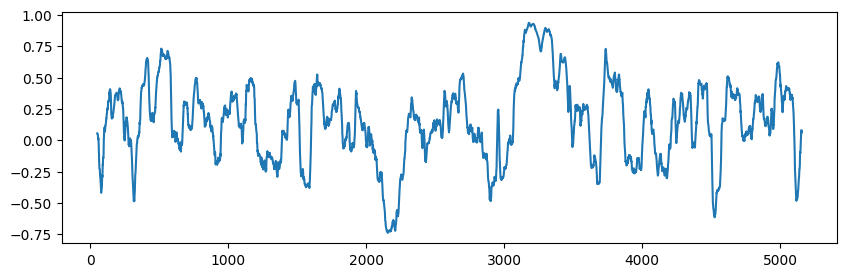

In [19]:
check_pearson(1,False,0,0)

In [ ]:
check_pearson(31)

In [78]:
all_events.loc[4].copy()

Unnamed: 0                                                         2487
TopHitNum                                                          1070
DriftRate                                                     -0.581643
SNR                                                            51.70536
Freq                                                        1379.312656
ChanIndx                                                         728355
FreqStart                                                   1379.312656
FreqEnd                                                     1379.312656
CoarseChanNum                                                        41
FullNumHitsInRange                                                    1
FileID                blc04_guppi_59405_45085_And_II_0030.rawspec.00...
Source                                                           AND_II
MJD                                                        59405.521817
RA                                                             1

In [22]:
f_start, f_stop, drift = get_f_bounds(1)

In [258]:
all_file_names[1]

['/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44453_And_II_0028.rawspec.0000.h5',
 '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_44769_HIP5682_0029.rawspec.0000.h5',
 '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45085_And_II_0030.rawspec.0000.h5',
 '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45410_HIP6776_0031.rawspec.0000.h5',
 '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_45735_And_II_0032.rawspec.0000.h5',
 '/datax/scratch/calebp/seticore_testing/snr_testing/8off10on/AND_II/blc03_guppi_59405_46059_HIP6702_0033.rawspec.0000.h5']

In [23]:
obs = Waterfall(all_file_names[1][0],f_start = f_start,f_stop=f_stop)

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


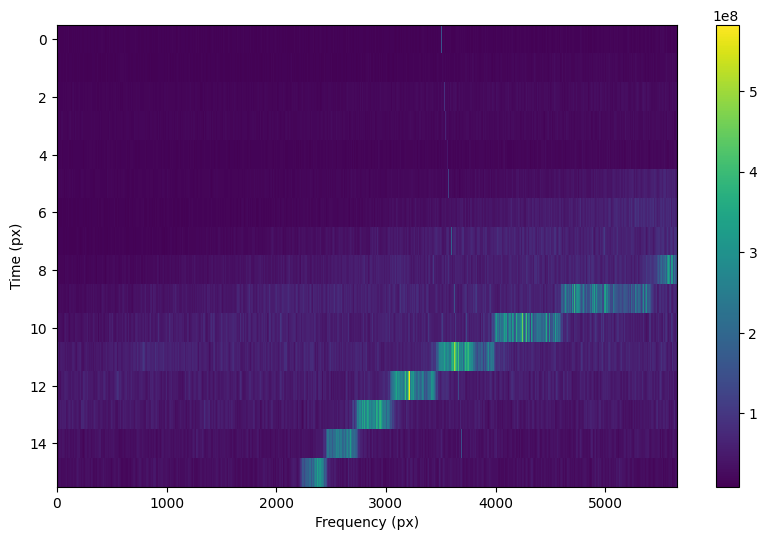

In [24]:
frame = stg.Frame(waterfall = obs)

fig = plt.figure(figsize=(10, 6))

signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=3500),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=15)),
                          stg.gaussian_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=2))

frame.plot()
data_signal = frame.get_data()
plt.show()


In [25]:
obs2 = Waterfall(all_file_names[1][1],f_start = f_start,f_stop=f_stop)

blimpy.io.base_reader WARNING  Given f_stop < f_start, assuming reversed values.


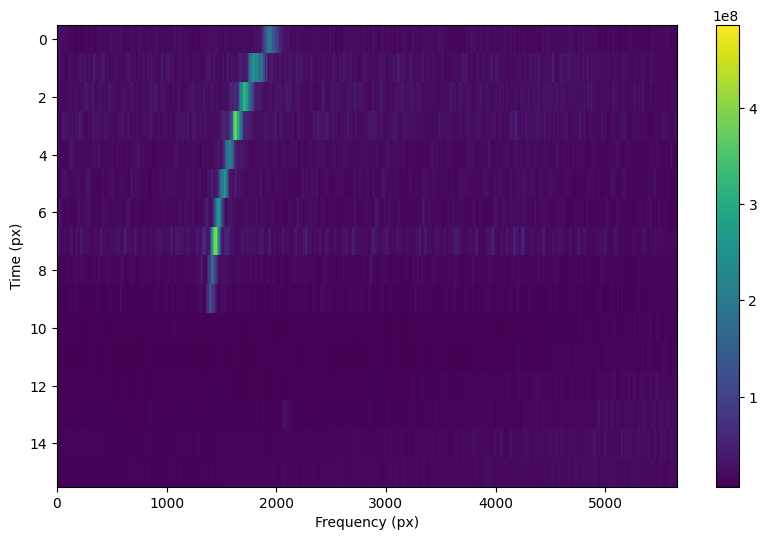

In [26]:
frame = stg.Frame(waterfall = obs2)

# signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
#                                             drift_rate=2*u.Hz/u.s),
#                           stg.constant_t_profile(level=frame.get_intensity(snr=30)),
#                           stg.gaussian_f_profile(width=10*u.Hz),
#                           stg.constant_bp_profile(level=2))

fig = plt.figure(figsize=(10, 6))
frame.plot()
data_no_signal = frame.get_data()
plt.show()

changing x
44453 44769
-3.949047
calc shift 226


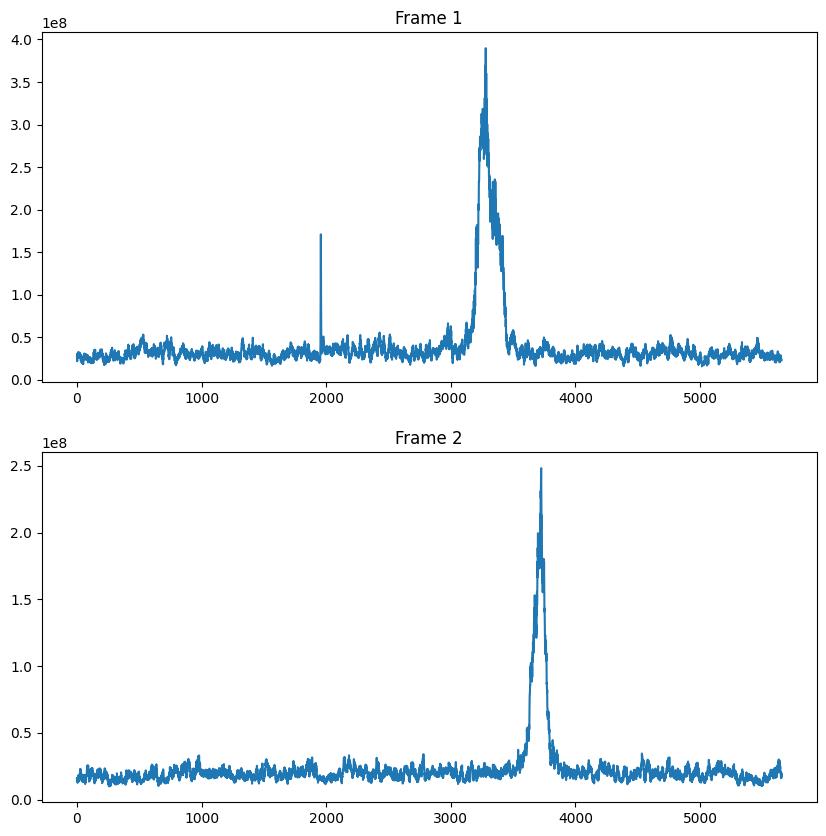

[0.06594485023106558, 0.06813160984149993, 0.07018731044175507, 0.07231292903662959, 0.07421818913158229, 0.07677108386437367, 0.07900835631162116, 0.08179418692943273, 0.08406646478276018, 0.08660310425932345, 0.08941730136938876, 0.0921467883197294, 0.09442407346296149, 0.09677848903109246, 0.09916456661949219, 0.10191045108221923, 0.10416032222958783, 0.1064412091203767, 0.10892929785417015, 0.11165271663791658, 0.11363913773537555, 0.11574401003777862, 0.11801034769569088, 0.12040149258278196, 0.12282333138852132, 0.12511291326418428, 0.12761989652789404, 0.13023538290930964, 0.13307805019122937, 0.13576155875708126, 0.13871404742491095, 0.14161938112875863, 0.1447004693915677, 0.14776242653129343, 0.1507929334591564, 0.15390177664747753, 0.15691680985084916, 0.15997957150198586, 0.16305321649837176, 0.16591716714756463]


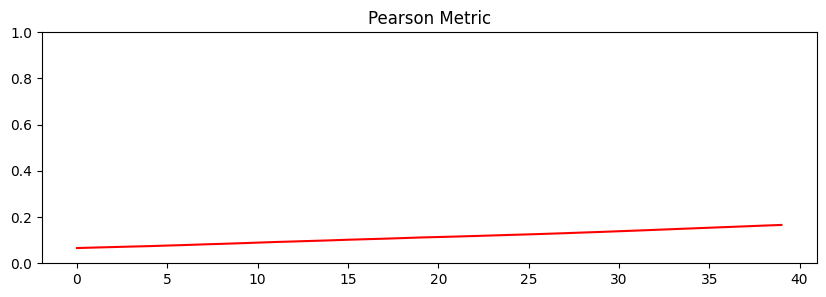

Max Pearson 0.16591716714756463


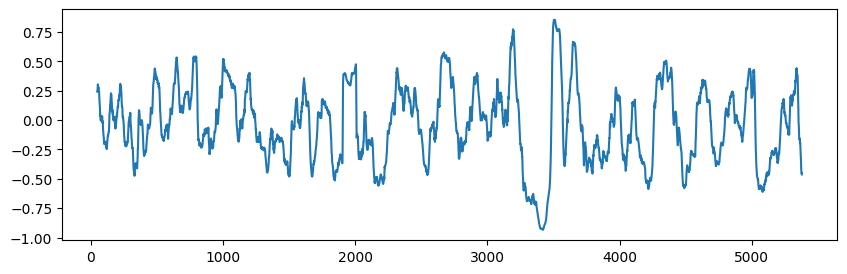

In [29]:
check_pearson(1, True,x_def = data_signal,y_def = data_no_signal)